In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read data
df = pd.read_csv("data/dat.csv", sep=',', index_col=False)
print(df)

   Unnamed: 0   x1   x2
0           1  1.1  6.5
1           2  2.1  6.5
2           3  2.1  5.5
3           4  1.1  4.5
4           5  2.1  3.5
5           6 -0.9 -2.5
6           7 -1.9 -4.5
7           8 -0.9 -5.5
8           9 -2.9 -6.5
9          10 -1.9 -7.5


In [3]:
# View data
X = df.iloc[:,1:]
print(X)

    x1   x2
0  1.1  6.5
1  2.1  6.5
2  2.1  5.5
3  1.1  4.5
4  2.1  3.5
5 -0.9 -2.5
6 -1.9 -4.5
7 -0.9 -5.5
8 -2.9 -6.5
9 -1.9 -7.5


<AxesSubplot:xlabel='x1', ylabel='x2'>

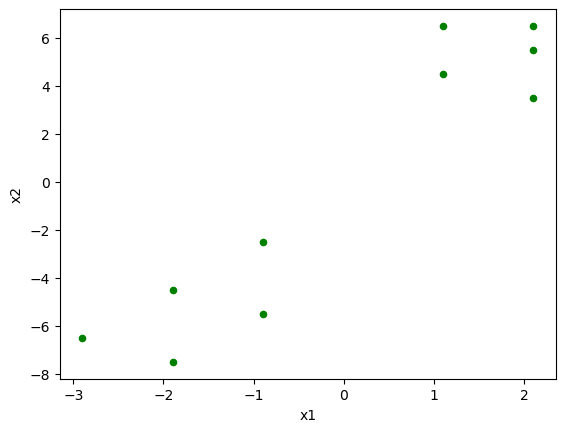

In [4]:
X.plot.scatter(x='x1', y='x2', c='g')

In [7]:
# Standardize the data
X = (X - X.mean())
X

,x1,x2
0,0.606450,1.181818
1,1.157767,1.181818
2,1.157767,1.000000
3,0.606450,0.818182
4,1.157767,0.636364
5,-0.496186,-0.454545
6,-1.047504,-0.818182
7,-0.496186,-1.000000
8,-1.598822,-1.181818
9,-1.047504,-1.363636


<AxesSubplot:xlabel='x1', ylabel='x2'>

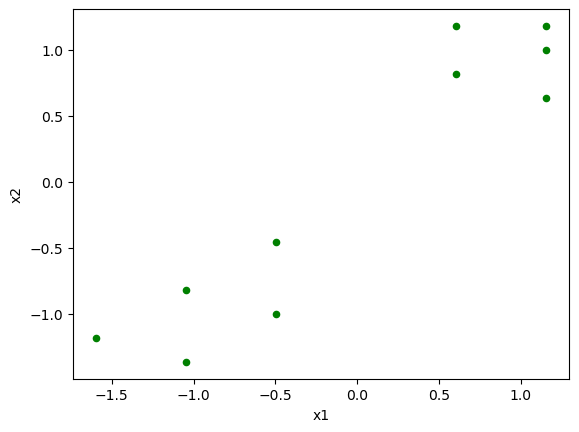

In [8]:
X.plot.scatter(x='x1', y='x2', c='g')

In [9]:
#Calcualting the correlation matrix of the data
X_corr = (1 / 10)* X.T.dot(X)
X_corr

,x1,x2
x1,1.00000,0.93724
x2,0.93724,1.00000


Text(0.5, 1.0, 'Correlation matrix')

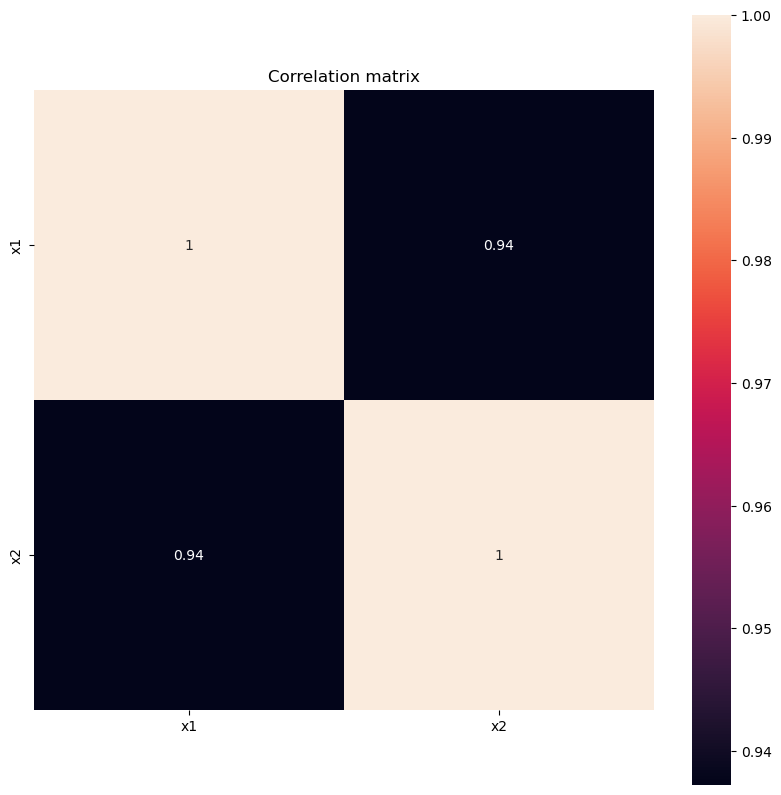

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(X_corr, vmax=1, square=True, annot=True)
plt.title('Correlation matrix')

In [11]:
# exact eigen values and eigen vectors
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s, u
score_matrix = pd.DataFrame(eig_vectors, columns=['PC1', 'PC2'], index=X.columns)
eig_values, score_matrix


(array([1.93724034, 0.06275966]),
          PC1       PC2
 x1 -0.707107 -0.707107
 x2 -0.707107  0.707107)

In [ ]:
# sum of eing values == number of variables ?
np.sum(eig_values) == 2

Text(0.5, 0, 'Dimensions')

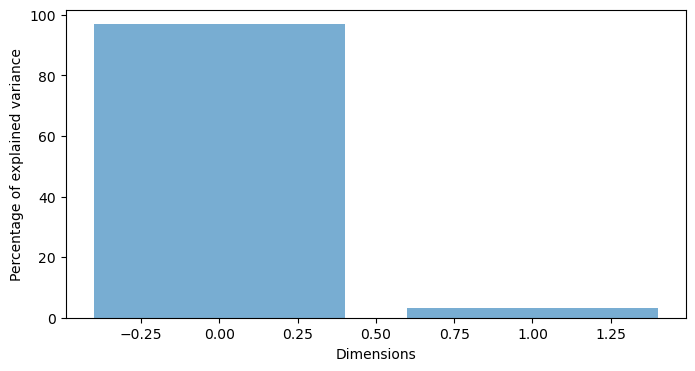

In [12]:
# plotting the variance explained by each PC 
explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(2), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')


In [ ]:
# this bar chart shows that the first dimension (PC1) will be enough to present
# the data
# oder eigenvalue für PC1 ist bigger than eigenvalue für PC2 -> bessere Varianzerklärung

In [15]:
# calculating our new axis
pc1 = X.dot(eig_vectors[:,0])
# pc1 = (-0,7071..) * x1 + (- 0,7071..) * x2
pc2 = X.dot(eig_vectors[:,1])
transfered_df = pd.DataFrame({'PC1': pc1,
                            'PC2' : pc2})
transfered_df


,PC1,PC2
0,-1.264496,0.406847
1,-1.654337,0.017006
2,-1.525772,-0.111558
3,-1.007367,0.149717
4,-1.268642,-0.368688
5,0.672269,0.029444
6,1.319239,0.162155
7,1.057963,-0.356250
8,1.966209,0.294866
9,1.704934,-0.223539


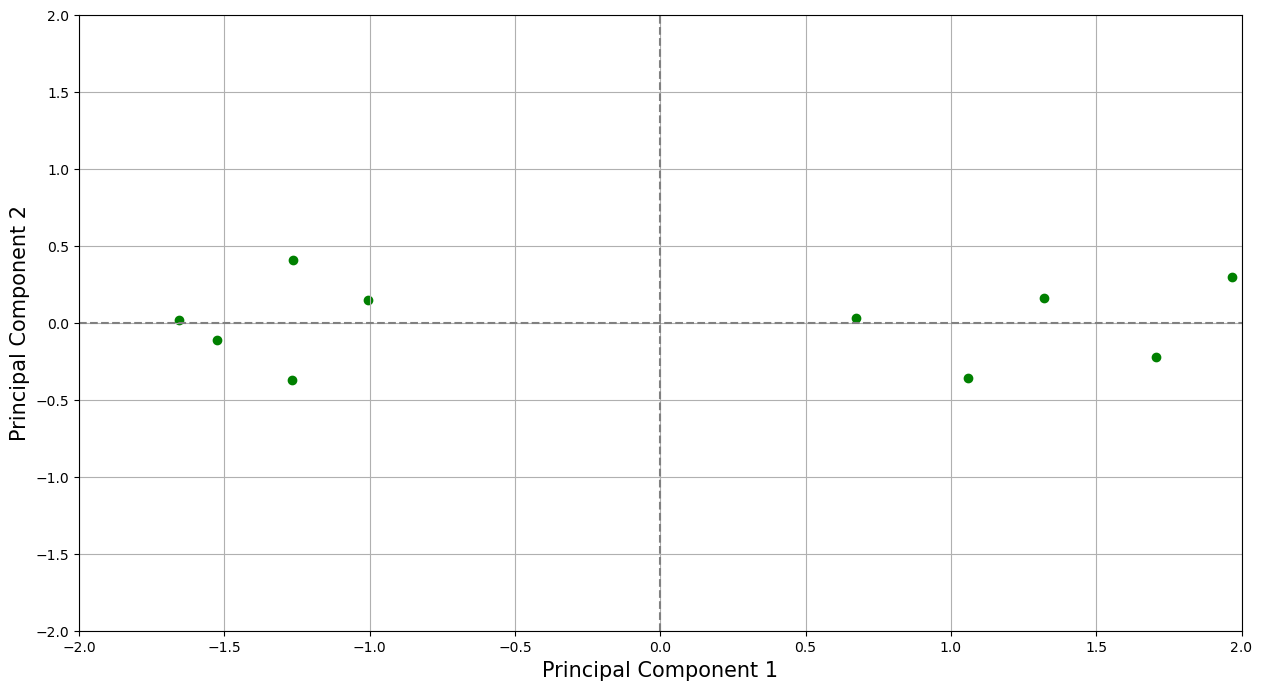

In [20]:
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize = (15, 8))
    xs = transfered_df.iloc[:,0]
    ys = transfered_df.iloc[:,1]
    n=transfered_df.shape[1]
    # scaling x and y
    # scalex = 1.0/(xs.max()- xs.min())
    # scaley = 1.0/(ys.max()- ys.min())
    # plt.scatter(pc1*scalex, pc2*scaley, c = 'g')
    plt.scatter(pc1, pc2, c = 'g')

    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.grid()
    plt.show()
plot_scatter(pc1, pc2)

In [ ]:
a = np.array([[1, 2], [2, 3]])
b = np.array([3, 4])
c = a.T * b
c

In [ ]:
# pca loadings = correlation between old variables and principle components (eigenverktors)
# pcloading = eig_vectors.T*np.sqrt(eig_values)
# loading_matrix = pd.DataFrame(pcloading, columns=['PC1', 'PC2'], index=X.columns)
# loading_matrix

In [ ]:
# loading_matrix.plot.scatter(x='PC1', y='PC2', c='g')

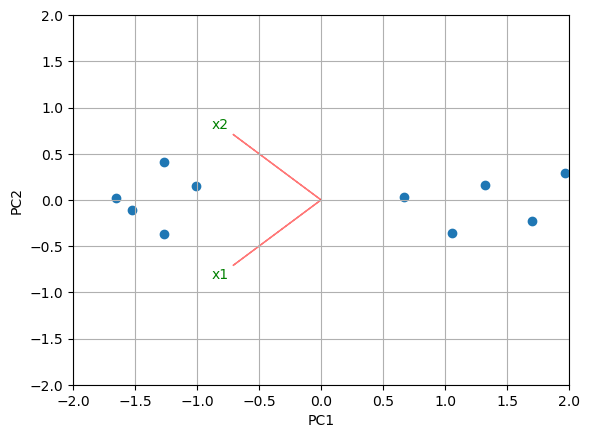

In [22]:
def biplot(score,coeff,pcax,pcay,labels=None):
    pca1 = pcax - 1
    pca2 = pcay - 1
    xs = score.iloc[:,pca1]
    ys = score.iloc[:,pca2]
    n=score.shape[1]
    # scaling x and y
    # scalex = 1.0/(xs.max()- xs.min())
    # scaley = 1.0/(ys.max()- ys.min())
    # plt.scatter(xs*scalex,ys*scaley)
    plt.scatter(xs,ys)
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
        if labels is None:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "x"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()

biplot(transfered_df,eig_vectors,1,2,labels=None)
